## Esercitazione 6 - 26 Marzo 2024

In [55]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy.utilities import lambdify
from mpl_toolkits.mplot3d import Axes3D

ModuleNotFoundError: No module named 'mpl'

In [8]:
def sign(x):
    return math.copysign(1, x)

Scrivere le funzioni python `bisezione.py`, `falsi.py`, `corde.py`, `secanti.py`,`newton.py` che implementino rispettivamente il metodo di bisezione, di falsa posizione, delle corde, delle secanti e di Newton.

Le funzioni `bisezione.py`, `falsi.py` devono assumere come input:

-  gli estremi dell'intervallo [a,b], dominio di f.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tol: tolleranza per il test di arresto.
    Nel caso del metodo di bisezione e di falsa posizione si considera per il test di arresto l’ampiezza del sottointervallo confrontata con tolx.
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

In [11]:
def bisezione(fname, a, b, tol):
    fa = fname(a)
    fb = fname(b)

    if sign(fa) * sign(fb) >= 0:
        print("Non e' possibile applicare il metodo di bisezione")
        return None, None, None

    maxit = math.ceil(math.log2((b - a) / tol))
    it = 0
    v_xk = []

    while (b-a) > tol:
        xk = a + (b - a) / 2
        v_xk.append(xk)
        it += 1

        fxk = fname(xk)

        if fxk == 0:
            return xk, it, v_xk

        if sign(fa) * sign(fxk) > 0: # nuovo intervallo [xk, b]
            a = xk
            fa = fxk
        elif sign(fxk) * sign(fb) > 0: # nuovo intervallo [a, xk]
            b = xk
            fb = fxk

    return xk, it, v_xk

In [27]:
def falsi(fname, a, b, tol, maxit):
    fa = fname(a)
    fb = fname(b)

    if sign(fa) * sign(fb) >= 0:
        print("Non e' possibile applicare il metodo di bisezione")
        return None, None, None

    it = 0
    v_xk = []
    fxk = math.inf
    tolf=tol

    while it < maxit and (b-a) > tol and abs(fxk) > tolf:
        xk = a - fa  * (b - a) / (fb - fa)
        v_xk.append(xk)
        it += 1

        fxk = fname(xk)

        if fxk == 0:
            return xk, it, v_xk

        if sign(fa) * sign(fxk) > 0: # nuovo intervallo [xk, b]
            a = xk
            fa = fxk
        elif sign(fxk) * sign(fb) > 0: # nuovo intervallo [a, xk]
            b = xk
            fb = fxk

    return xk, it, v_xk


La funzione `corde.py` deve assumere come input:

-  l'iterato iniziale x_0.
-  il coefficiente angolare comune a tutte le rette
-  il nome `fname` della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:          
               |x_k+1-x_k|/|x_k+1|<= tolx
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

In [ ]:
def corde(f, m, x0, tol, nmax):
    v_xk = []
    fx0 = f(x0)
    dx0 = fx0 / m #valuto l'incremento di x0
    x1 = x0 - dx0

    tolf = tol

    fx1 = f(x1)
    v_xk.append(fx1)
    it = 1

    while it < nmax and abs(fx1) > tolf and abs(dx0) >= tol * abs(x1):
        x0 = x1
        fx0 = f(x0)
        dx0 = fx0 / m

        x1 = x0 - dx0
        fx1 = f(x1)
        
        it += 1
        v_xk.append(x1)

    if it == nmax:
        print("Numero massimo di iterazioni raggiunto")

    return x1, it, v_xk


La funzione `newton.py` deve assumere come input:

-  l'iterato iniziale x_0.
-  il nome `fname` della funzione di cui calcolare lo zero
-  il nome `fpname` della derivata prima della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:          
               |x_k+1-x_k|/|x_k+1|<= tols
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

In [49]:
def newton(f, df, x0, tol, nmax):
    v_xk = []
    fx0 = f(x0)
    dx0 = fx0 / df(x0) #valuto l'incremento di x0
    x1 = x0 - dx0

    tolf = tol

    fx1 = f(x1)
    v_xk.append(x1)
    it = 1

    while it < nmax and abs(fx1) > tolf and abs(dx0) >= tol * abs(x1):
        x0 = x1
        fx0 = f(x0)
        dx0 = fx0 / df(x0)

        x1 = x0 - dx0
        fx1 = f(x1)
        
        it += 1
        v_xk.append(x1)

    if it == nmax:
        print("Numero massimo di iterazioni raggiunto")

    return x1, it, v_xk


La funzione `secanti.py` deve assumere come input:

-  due iterati iniziali x_1, x_0.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:         
               |x_k+1-x_k|/|x_k+1|<= tolx
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

**Sperimentazione numerica**

 Confrontare i metodi sopra implementati nei casi seguenti:

- f(x) = exp(−x) − (x + 1) in [−1, 2] con x0 = −0.5, x−1 = −0.3, tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=0);
- f(x) = log2(x + 3) − 2 in [−1, 2] con x0 = −0.5, x−1 = 0.5, tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
- f(x) =sqrt(x)-(x^2)/4 in [1, 3] con x0 = 1.8, x−1 = 1.5, tolx = 1.e − 12, tolf =1.e − 12, (soluzione esatta alfa=2**(4/3))

Mostrare in un grafico in scala semilogaritmica sulle ordinate (comando semilogy) l’andamento di ek = |xk − α|, k = 1, ..., nit, sapendo che α = 0, 1, 2**(4/3) nei
tre casi.
Calcolare infine, a partire dai valori di {xk} con k sufficientemente grande, la stima dell’ordine di convergenza p come

p= ln (|x_{k+1}-x_k|/|x_k-x_{k-1}|)/ln (|x_k-x_{k-1}|/|x_{k-1}-x_{k-2}|)

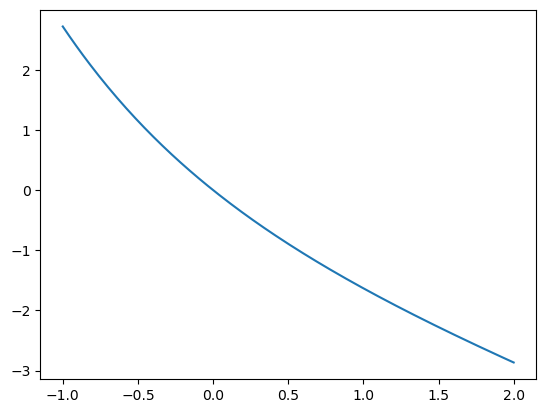

In [23]:
f = lambda x: np.exp(-x) - (x + 1)
a = -1
b = 2

xx = np.linspace(a, b, 200)
plt.plot(xx, f(xx))
plt.show()

zero_b 1.7763568394002505e-15 nit_b 49


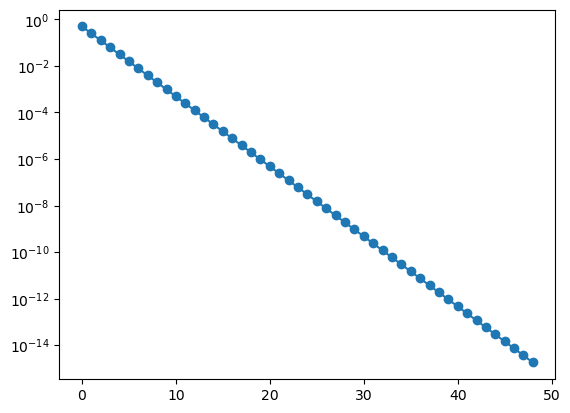

In [24]:
# Bisezione
tol = 1e-14
zero_b, it_bis, v_xk_b = bisezione(f, a, b, tol)
print("zero_b", zero_b, "nit_b", it_bis)

alfa = 0
err_bis = np.abs(np.array(v_xk_b) - alfa)
plt.semilogy(range(it_bis), err_bis, '-o')

zero_b 1.5543122344752192e-15 nit_b 26


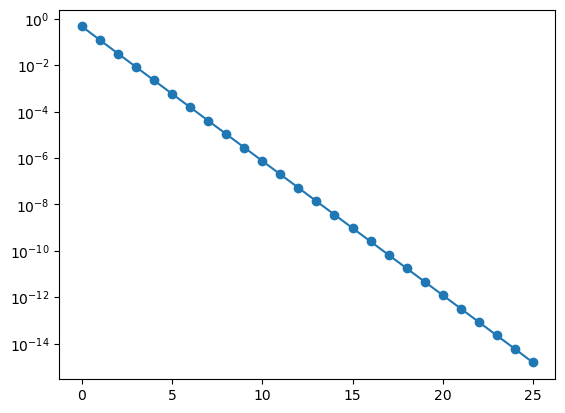

In [28]:
#Regula falsi
maxit=50
zero_f, it_fal, v_xk_f = falsi(f, a, b, tol, maxit)
print("zero_f", zero_f, "nit_fal", it_fal)

alfa = 0
err_fal = np.abs(np.array(v_xk_f) - alfa)
plt.semilogy(range(it_fal), err_fal, '-o')

zero_new -3.3014009092026803e-17 nit_new 5


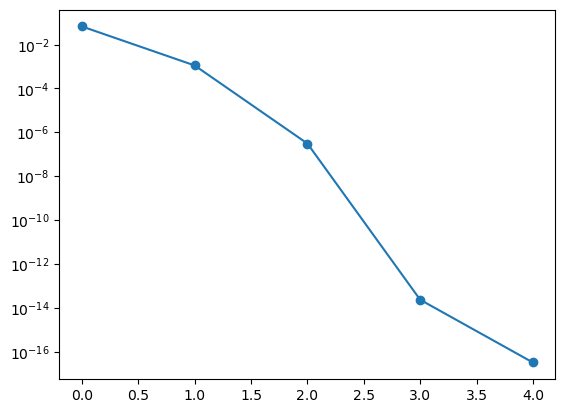

In [52]:
#Newton
x = sym.symbols('x')
f = sym.exp(-x) - (x + 1)
df = sym.diff(f, x, 1)

f = lambdify(x, f, np)
fp = lambdify(x, df, np)
x0 = -0.5
nmax = 500

zero_new, it_new, v_xk_new = newton(f, fp, x0, tol, nmax)
print("zero_new", zero_new, "nit_new", it_new)

alfa = 0
err_new = np.abs(np.array(v_xk_new) - alfa)
plt.semilogy(range(it_new), err_new, '-o')

- Utilizzare il metodo di Newton e il metodo di Newton modificato per il calcolo
dello zero di molteplicita' 2 della funzione f(x) = 
x^3 + x^2− 33x + 63 con x0 = 1,
tolx = 1.e − 12 e tolf = 1.e − 12. Calcolare infine, a partire dai valori di {xk}
ottenuti nei due casi, la stima dell’ordine di convergenza p.

- Utilizzare il metodo di bisezione ed il metodo di Newton per calcolare la radice quadrata di 2. Analizzate i risultati.

- Utilizzare il metodo di Newton per determinare le radici dell’equazione f (x) = 
rcatan(x) con x0 = 1.2, 1.4 assumendo tolx = 1.e − 6 e tolf = 1.e − 5. Che cos a
si osserva?

**Soluzione di sistemi non lineari**


- Scrivere la function `NewtonRaphson.py`, che implementa il metodo di Newton-Raphson
per il calcolo della soluzione di un sistema di equazioni non lineari. 

    Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.


**Sperimentazione Numerica**

Risolvere i seguenti tre sistemi non lineari:

1) 2x0-cos(x1)=0

   sin(x0)+2x1=0

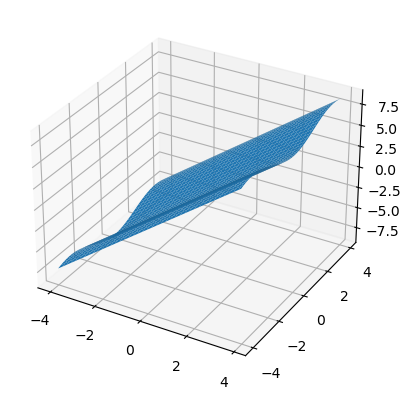

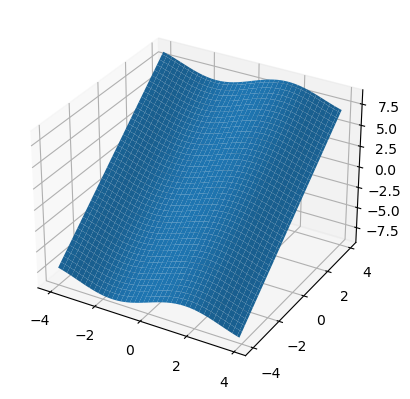

In [57]:
F = lambda x: np.array([2*x[0] - np.cos(x[1]), np.sin(x[0]) + 2*x[1]])
J = lambda x: np.array([[2, np.sin(x[1])], [np.cos(x[0]), 2]])

x = np.arange(-4, 4, 0.1)
y = np.arange(-4, 4, 0.1)

X,Y = np.meshgrid(x, y)
Z1 = 2*X - np.cos(Y)
Z2 = np.sin(X) + 2*Y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z1)
plt.show()

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_surface(X, Y, Z2)
plt.show()

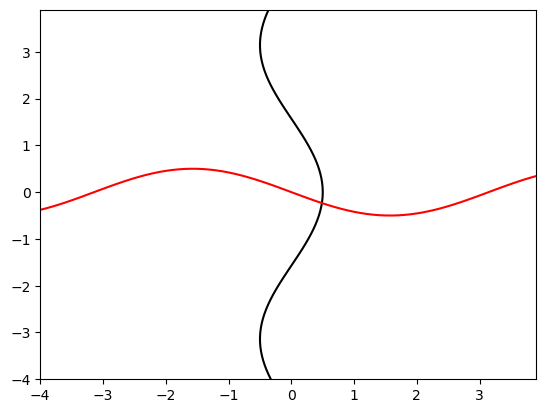

In [59]:
plt.contour(X,Y,Z1, levels=[0], colors='black')
plt.contour(X,Y,Z2, levels=[0], colors='red')
plt.show()


2) 

   x0^2+x1^2-9=0

   x0+x1-3=0

3) 

   4x0^2+x_1^2=4

   x0+x1=sin(x0-x1)



Servirsi del metodo grafico per individuare un 
iterato iniziale  $X_0$  nell'intorno della soluzione che si vuole approssimare. Visualizzare le 
curve di livello corrisponenti a z=0 delle due superfici z1 = f1 (x0 ,x1 ) e z2 = f2(x0, x1 ) e 
definire come iterato iniziale un vettore $X_0$ oppurtuno le cui componenti stanno in un 
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) 
 